In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.formula.api as sm

################ include this code when importing your libraries 

pd.set_option('display.max_columns', None) ## show all the columns in dataset
pd.set_option('display.max_rows', None) ## show all rows in dataset

################

df = pd.read_excel("IBM Employee Attrition.xlsx")

df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,3,2,Sales Executive,4,Single,5993,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,2,2,Research Scientist,2,Married,5130,1,Y,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,3,1,Research Scientist,3,Married,2909,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,Y,No,12,3,4,1,6,3,3,2,2,2,2


# Data Prep & Cleaning

In [ ]:
#•	Data prep and cleaning – 
#prior to exploring the data, 
#you should ensure that the dataset is clean, 
#all variables are in their proper format, 
#and the data is free of missing, abnormal, 
#or outlier values

In [3]:
df.info() #Finding out about the columsn 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeNumber            1470 non-null   int64 
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  JobInvolvement            1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus           

In [4]:
df.isnull().sum() #There are no null columns 

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [5]:
#### Outlier Removal
## Using the z-score method for outlier identification and removal 

## starting shape
print ("starting shape:", df.shape)

starting shape: (1470, 30)


In [7]:
## calculate zscores
df["zscore_Age"] = np.abs(stats.zscore(df["Age"]))
df["zscore_DistanceFromHome"] = np.abs(stats.zscore(df["DistanceFromHome"]))
df["zscore_Education"] = np.abs(stats.zscore(df["Education"]))
df["zscore_EmployeeNumber"] = np.abs(stats.zscore(df["EmployeeNumber"]))
df["zscore_EnvironmentSatisfaction"] = np.abs(stats.zscore(df["EnvironmentSatisfaction"]))
df["zscore_JobInvolvement"] = np.abs(stats.zscore(df["JobInvolvement"]))
df["zscore_JobLevel"] = np.abs(stats.zscore(df["JobLevel"]))
df["zscore_JobSatisfaction"] = np.abs(stats.zscore(df["JobSatisfaction"]))
df["zscore_MonthlyIncome"] = np.abs(stats.zscore(df["MonthlyIncome"]))
df["zscore_NumCompaniesWorked"] = np.abs(stats.zscore(df["NumCompaniesWorked"]))
df["zscore_PercentSalaryHike"] = np.abs(stats.zscore(df["PercentSalaryHike"]))
df["zscore_PerformanceRating"] = np.abs(stats.zscore(df["PerformanceRating"]))
df["zscore_RelationshipSatisfaction"] = np.abs(stats.zscore(df["RelationshipSatisfaction"]))
df["zscore_StockOptionLevel"] = np.abs(stats.zscore(df["StockOptionLevel"]))
df["zscore_TotalWorkingYears"] = np.abs(stats.zscore(df["TotalWorkingYears"]))
df["zscore_TrainingTimesLastYear"] = np.abs(stats.zscore(df["TrainingTimesLastYear"]))
df["zscore_WorkLifeBalance"] = np.abs(stats.zscore(df["WorkLifeBalance"]))
df["zscore_YearsAtCompany"] = np.abs(stats.zscore(df["YearsAtCompany"]))
df["zscore_YearsInCurrentRole"] = np.abs(stats.zscore(df["YearsInCurrentRole"]))
df["zscore_YearsSinceLastPromotion"] = np.abs(stats.zscore(df["YearsSinceLastPromotion"]))
df["zscore_YearsWithCurrManager"] = np.abs(stats.zscore(df["YearsWithCurrManager"]))

In [8]:
###

## 
Age_outliers = df[df["zscore_Age"] > 3].index
df = df.drop(Age_outliers)

## 
DistanceFromHome_outliers = df[df["zscore_DistanceFromHome"] > 3].index
df = df.drop(DistanceFromHome_outliers)

## 
Education_outliers = df[df["zscore_Education"] > 3].index
df = df.drop(Education_outliers)

## 
EmployeeNumber_outliers = df[df["zscore_EmployeeNumber"] > 3].index
df = df.drop(EmployeeNumber_outliers)

## 
EnvironmentSatisfaction_outliers = df[df["zscore_EnvironmentSatisfaction"] > 3].index
df = df.drop(EnvironmentSatisfaction_outliers)

## 
JobInvolvement_outliers = df[df["zscore_JobInvolvement"] > 3].index
df = df.drop(JobInvolvement_outliers)

## 
JobSatisfaction_outliers = df[df["zscore_JobSatisfaction"] > 3].index
df = df.drop(JobSatisfaction_outliers)

## 
JobLevel_outliers = df[df["zscore_JobLevel"] > 3].index
df = df.drop(JobLevel_outliers)

## 
MonthlyIncome_outliers = df[df["zscore_MonthlyIncome"] > 3].index
df = df.drop(MonthlyIncome_outliers)

## 
NumCompaniesWorked_outliers = df[df["zscore_NumCompaniesWorked"] > 3].index
df = df.drop(NumCompaniesWorked_outliers)

## 
PercentSalaryHike_outliers = df[df["zscore_PercentSalaryHike"] > 3].index
df = df.drop(PercentSalaryHike_outliers)

## 
PerformanceRating_outliers = df[df["zscore_PerformanceRating"] > 3].index
df = df.drop(PerformanceRating_outliers)

## 
RelationshipSatisfaction_outliers = df[df["zscore_RelationshipSatisfaction"] > 3].index
df = df.drop(RelationshipSatisfaction_outliers)

## 
StockOptionLevel_outliers = df[df["zscore_StockOptionLevel"] > 3].index
df = df.drop(StockOptionLevel_outliers)

## 
TotalWorkingYears_outliers = df[df["zscore_TotalWorkingYears"] > 3].index
df = df.drop(TotalWorkingYears_outliers)

## 
TrainingTimesLastYear_outliers = df[df["zscore_TrainingTimesLastYear"] > 3].index
df = df.drop(TrainingTimesLastYear_outliers)

## 
WorkLifeBalance_outliers = df[df["zscore_WorkLifeBalance"] > 3].index
df = df.drop(WorkLifeBalance_outliers)

## 
YearsAtCompany_outliers = df[df["zscore_YearsAtCompany"] > 3].index
df = df.drop(YearsAtCompany_outliers)

## 
YearsInCurrentRole_outliers = df[df["zscore_YearsInCurrentRole"] > 3].index
df = df.drop(YearsInCurrentRole_outliers)

## 
YearsWithCurrManager_outliers = df[df["zscore_YearsWithCurrManager"] > 3].index
df = df.drop(YearsWithCurrManager_outliers)

In [10]:
## ending shape; dropping zscore columns
df.drop(columns=["zscore_Age", "zscore_DistanceFromHome", "zscore_Education", "zscore_EmployeeNumber", "zscore_EnvironmentSatisfaction", "zscore_JobInvolvement", "zscore_JobLevel", "zscore_JobSatisfaction", "zscore_MonthlyIncome", "zscore_NumCompaniesWorked", "zscore_PercentSalaryHike", "zscore_PerformanceRating", "zscore_RelationshipSatisfaction", "zscore_StockOptionLevel", "zscore_TotalWorkingYears", "zscore_TrainingTimesLastYear", "zscore_WorkLifeBalance", "zscore_YearsAtCompany", "zscore_YearsInCurrentRole", "zscore_YearsWithCurrManager"], inplace=True)


print ("shape after outliers removed:", df.shape)

shape after outliers removed: (1412, 31)


# Exploratory Data Analysis

In [ ]:
#•	Exploratory data analysis – 
#you should explore every aspect of the data to determine the features of the data, 
#the range of values for all variables of interest, and the relationships between variables. 
#Exploration should be conducted outside of predictive modeling – in other words, 
#you are not only interested in how the dependent and independent variables interact – 
#you should also spend some time exploring variations in the data among variables 
#(i.e. how does salary differ between genders? Does time spent in the company differ by job role?)

In [11]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,zscore_YearsSinceLastPromotion
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,3,2,Sales Executive,4,Single,5993,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5,0.679146
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,2,2,Research Scientist,2,Married,5130,1,Y,No,23,4,4,1,10,3,3,10,7,1,7,0.368715
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0,0.679146
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,3,1,Research Scientist,3,Married,2909,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0,0.252146
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,Y,No,12,3,4,1,6,3,3,2,2,2,2,0.058285


In [12]:
df["Age"].describe()

count    1412.000000
mean       36.400850
std         8.855927
min        18.000000
25%        30.000000
50%        35.000000
75%        42.000000
max        60.000000
Name: Age, dtype: float64

In [14]:
df["Attrition"].value_counts()

No     1179
Yes     233
Name: Attrition, dtype: int64

In [15]:
df["Gender"].value_counts()

Male      848
Female    564
Name: Gender, dtype: int64

In [16]:
## Attrition & Gender

pd.crosstab(df["Gender"], df["Attrition"]) #attrition 

Attrition,No,Yes
Gender,,
Female,480,84
Male,699,149


In [18]:
df["JobSatisfaction"].groupby(df["Gender"]).mean() #JobSatisfaction is higher for the males 

Gender
Female    2.684397
Male      2.772406
Name: JobSatisfaction, dtype: float64

In [19]:
df["YearsAtCompany"].groupby(df["JobRole"]).mean() #There is a difference between job roles. Laboratory technitian being the lowest and Manger being the higuest 

JobRole
Healthcare Representative     7.653543
Human Resources               5.326923
Laboratory Technician         4.788235
Manager                      11.103896
Manufacturing Director        7.283688
Research Director             8.865672
Research Scientist            5.061856
Sales Executive               7.253918
Sales Representative          2.915663
Name: YearsAtCompany, dtype: float64

In [23]:
pd.crosstab(df["JobRole"], df["Attrition"])

Attrition,No,Yes
JobRole,,
Healthcare Representative,119,8
Human Resources,40,12
Laboratory Technician,193,62
Manager,73,4
Manufacturing Director,132,9
Research Director,66,1
Research Scientist,244,47
Sales Executive,262,57
Sales Representative,50,33


In [24]:
df["YearsAtCompany"].groupby(df["Attrition"]).mean() #More years at the company means probably lower attrition

Attrition
No     6.696353
Yes    4.635193
Name: YearsAtCompany, dtype: float64

In [25]:
df["MonthlyIncome"].value_counts()

2342     4
6142     3
2451     3
3452     3
5562     3
2380     3
2741     3
2610     3
2404     3
2559     3
6347     3
2187     2
2127     2
2942     2
2936     2
2973     2
2033     2
4941     2
3162     2
4284     2
2096     2
5993     2
5204     2
6272     2
5346     2
5343     2
2044     2
17328    2
3294     2
2377     2
2008     2
3420     2
2956     2
2073     2
2042     2
5238     2
6811     2
5484     2
2439     2
2515     2
2657     2
6804     2
2782     2
4876     2
4898     2
2340     2
2372     2
5410     2
2720     2
5405     2
2362     2
10609    2
2177     2
3904     2
2450     2
6500     2
4639     2
2070     2
6397     2
3760     2
2500     2
4724     2
3072     2
5561     2
4779     2
5467     2
2996     2
2323     2
5769     2
5605     2
2587     2
4968     2
2109     2
5228     2
2436     2
5473     2
2911     2
4197     2
2028     2
10096    2
9980     2
2406     2
6162     2
4014     2
17861    2
2269     2
2132     2
2564     2
7756     2
4011     2
4148     2

In [26]:
bins = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
bin_labels = ["1000", "2000", "3000", "4000", "5000", "6000", "7000", "8000", "9000", "10000+"]
df["MonthlyIncome_Groups"] = pd.cut(df["MonthlyIncome"], bins, labels = bin_labels)

In [27]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,zscore_YearsSinceLastPromotion,MonthlyIncome_Groups
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,3,2,Sales Executive,4,Single,5993,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5,0.679146,6000
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,2,2,Research Scientist,2,Married,5130,1,Y,No,23,4,4,1,10,3,3,10,7,1,7,0.368715,6000
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0,0.679146,3000
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,3,1,Research Scientist,3,Married,2909,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0,0.252146,3000
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,Y,No,12,3,4,1,6,3,3,2,2,2,2,0.058285,4000


In [29]:
pd.crosstab(df["MonthlyIncome_Groups"], df["Attrition"]) #Inverse Relationship between Income and Attrition, not surprisingly

Attrition,No,Yes
MonthlyIncome_Groups,,
2000,15,18
3000,266,95
4000,123,24
5000,177,26
6000,149,16
7000,110,11
8000,44,7
9000,42,6
10000+,43,9


In [52]:
df["JobSatisfaction"].groupby(df["Attrition"]).mean()

Attrition
0    2.793893
1    2.450644
Name: JobSatisfaction, dtype: float64

# Modeling

In [ ]:
# Modeling – after thoroughly exploring the data, 
#create a logistic regression model that predicts employee attrition based 
#on the other variables available to you. 
#Clearly interpret your model findings. 
#Re-run/tweak your model if you think you can find a better fit. 

In [30]:
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

No     1179
Yes     233
Name: Attrition, dtype: int64


<AxesSubplot:xlabel='Attrition', ylabel='count'>

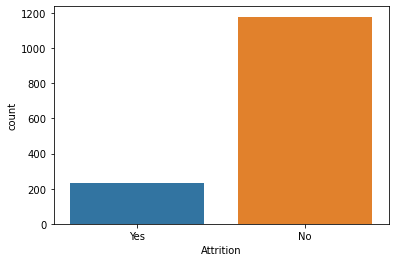

In [32]:
###

print(df["Attrition"].value_counts())

###

sns.countplot(data = df, x = "Attrition")

In [51]:
#First we have to replace some values in the columsn from whatever they are into 1s & 0s. 

df["Attrition"].replace(["Yes","No"],[1, 0], inplace = True)

In [36]:
df["Gender"].replace(["Male","Female"],[1, 0], inplace = True)

In [37]:
df["OverTime"].replace(["Yes","No"],[1, 0], inplace = True)

In [48]:
mod1 = sm.logit('Attrition ~ Age + Education + Gender + JobSatisfaction + MonthlyIncome + OverTime + TotalWorkingYears + YearsAtCompany + YearsInCurrentRole + YearsSinceLastPromotion', data=df).fit()

mod1.summary()

Optimization terminated successfully.
         Current function value: 0.373209
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1412
Model:                          Logit   Df Residuals:                     1401
Method:                           MLE   Df Model:                           10
Date:                Tue, 12 Apr 2022   Pseudo R-squ.:                  0.1667
Time:                        20:51:56   Log-Likelihood:                -526.97
converged:                       True   LL-Null:                       -632.42
Covariance Type:            nonrobust   LLR p-value:                 8.536e-40
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.5566      0.443      1.256      0.209      -0.312       1.425
Age                        -0.0346      0.012     -2.856      0.004      -0.058      -0.011
Education                   0.0311      0.078      0.399      0.690      -0.122       0.184
Gender                      0.3022      0.164      1.848      0.065      -0.018       0.623
JobSatisfaction            -0.3360      0.070     -4.771      0.000      -0.474      -0.198
MonthlyIncome           -6.602e-05    3.3e-05     -2.003      0.045      -0.000   -1.42e-06
OverTime                    1.5421      0.161      9.569      0.000       1.226       1.858
TotalWorkingYears          -0.0215      0.024     -0.890      0.374      -0.069       0.026
YearsAtCompany             -0.0368      0.036     -1.014      0.311      -0.108       0.034
YearsInCurrentRole         -0.1505      0.044     -3.390      0.001      -0.237      -0.063
YearsSinceLastPromotion     0.1744      0.040      4.410      0.000       0.097       0.252
===========================================================================================
"""

In [49]:
## print just the variable coefficient values

mod1.params

Intercept                  0.556629
Age                       -0.034612
Education                  0.031149
Gender                     0.302239
JobSatisfaction           -0.336000
MonthlyIncome             -0.000066
OverTime                   1.542150
TotalWorkingYears         -0.021515
YearsAtCompany            -0.036818
YearsInCurrentRole        -0.150463
YearsSinceLastPromotion    0.174384
dtype: float64

In [50]:
## create a dataframe with the variable names, OR's and p-values
# np.exp >> calculate the exponential of a given value

df_odds = pd.DataFrame(np.exp(mod1.params), columns = ['OR'])

## pull the pvalues directly from the model

df_odds["pvalue"] = mod1.pvalues

## create a variable to quickly determine sig

df_odds["Sig"] = np.where(df_odds["pvalue"] <= 0.05, "Sig", "Not Sig")

## print new dataset

df_odds

,OR,pvalue,Sig
Intercept,1.744781,2.091068e-01,Not Sig
Age,0.965980,4.289824e-03,Sig
Education,1.031639,6.897048e-01,Not Sig
Gender,1.352884,6.461747e-02,Not Sig
JobSatisfaction,0.714623,1.833948e-06,Sig
MonthlyIncome,0.999934,4.515895e-02,Sig
OverTime,4.674629,1.082708e-21,Sig
TotalWorkingYears,0.978715,3.736161e-01,Not Sig
YearsAtCompany,0.963852,3.105928e-01,Not Sig
YearsInCurrentRole,0.860310,6.979679e-04,Sig


Interpretations 

Age is significant and with each year the person gets older, the odds of leaving increase by 0.97%
Job Satisfaction is significant and with each increase you are 0.71% more likely 
MonthlyIncome
YearsInCurrentRole, the more years, you are 0.86% more likely to leave
YearsSinceLastPromotion, if you get a promotion, you are 1.19% more likely to leave 

# Visulization

In [ ]:
# Visualization – Create at least 3 visualizations that highlight some of the most 
#interesting findings in your dataset. 
#These can be findings from the regression model 
#or any interesting relationships between variables. 

<AxesSubplot:xlabel='MonthlyIncome_Groups', ylabel='Count'>

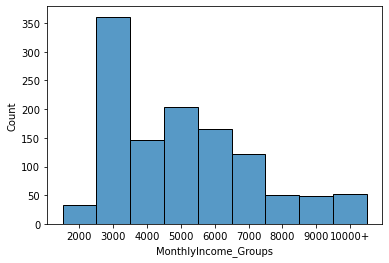

In [53]:
#1 Monthly Income buckets 

sns.histplot(df["MonthlyIncome_Groups"], kde = False)

In [ ]:
#As we can see most of the employees fall in the $3000-$3999 salary group 

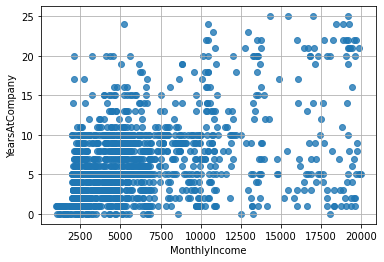

In [55]:
#2

sns.regplot(x = df["MonthlyIncome"], y = df["YearsAtCompany"], fit_reg = False)

plt.grid()

In [ ]:
#Just from looking at the data points, it is not dissernable that years at the company means a higher salary
#There are people in the lower end that make more than $20,000 and yet have worked less than 5 years. 

Text(0.5, 1.0, 'Frequency of Pokemon Type across Stage')

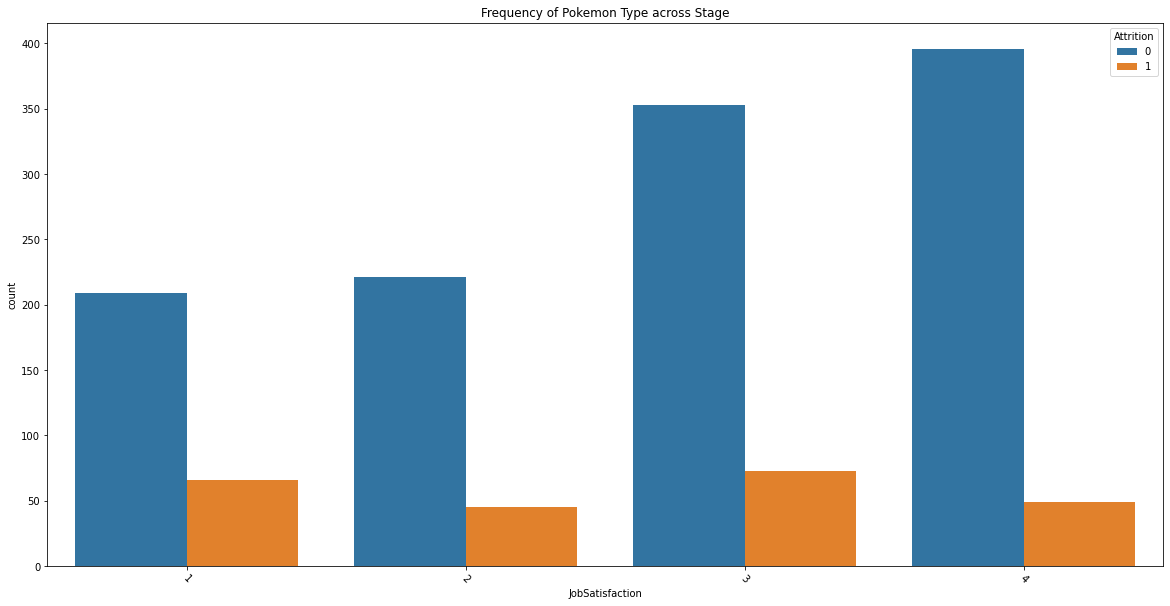

In [56]:
#Attrition by Job Satisfaction

plt.figure(figsize=(20,10))

sns.countplot(data = df, x = "JobSatisfaction", hue = "Attrition")

plt.xticks(rotation = -45)
plt.title('Attrition by Job Satisfaction')

In [ ]:
# Here we can see that the longer people remain at the company, the more likely they are to remain 